In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [2]:
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()

In [3]:
len(X_train)

60000

In [4]:
len(X_test)

10000

In [5]:
X_train[0].shape

(28, 28)

In [6]:
# X_train

In [7]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

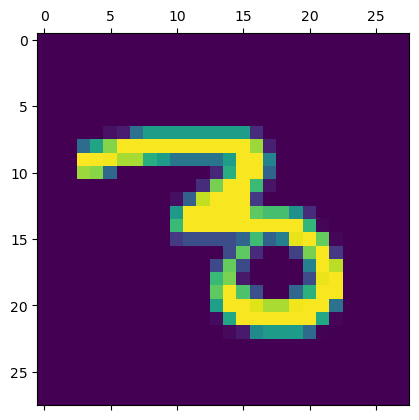

In [8]:
plt.matshow(X_train[30]) ## checking what number the 30th(31st, actually) training data is

In [9]:
y_train[30] #this is the output: what the 30th input is/gives

3

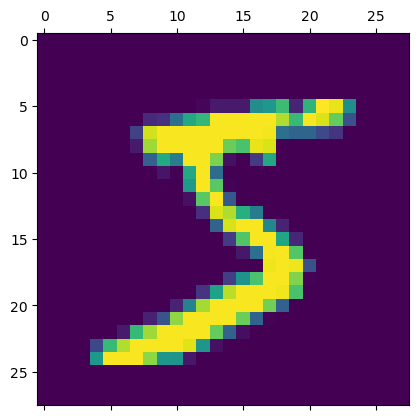

In [10]:
plt.matshow(X_train[0])

In [11]:
y_train[0] #this is the number (detected)

5

In [12]:
y_train[:31] #these are the first 31st digits (you'll note that 3 is the 31st number)

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4, 3, 5, 3, 6, 1, 7, 2, 8, 6, 9, 4, 0,
       9, 1, 1, 2, 4, 3, 2, 7, 3], dtype=uint8)

In [13]:
## now, we want to reshape our X_train into a ONE DIMENSIONAL array
X_train.shape #this is the original dimensiion... the 60000 is the len; 28 by 28 is the dimension

(60000, 28, 28)

In [14]:
### the scalinng is done before you flatten

In [15]:
X_train = X_train/255
X_test = X_test/255 #255 is the highest number in our image digits represenation, so we are dividing
# bt that 255 so that the digits in the image representation will be btw 0 and 1, 1 being the max

In [16]:
X_train_flattened = X_train.reshape(len(X_train), 28*28) ###we are using pandas reshape function
X_train_flattened.shape ###the dimension is no longer 28,28, but now 784(one dimension)

(60000, 784)

In [17]:
###let's reshape X_test too
X_test_flattened = X_test.reshape(len(X_test), 28*28)
X_test_flattened.shape

(10000, 784)

In [18]:
# now let's check what the first value of our X_train looks like now that we have reshaped
X_test_flattened[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [19]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')
]) #dense means that every neuron in the first layer is connected to the ones in the  other layer

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 20s 9ms/step - loss: 0.4668 - accuracy: 0.8774
Epoch 2/5
1875/1875 [==============================] - 14s 8ms/step - loss: 0.3031 - accuracy: 0.9159
Epoch 3/5
1875/1875 [==============================] - 14s 7ms/step - loss: 0.2833 - accuracy: 0.9216
Epoch 4/5
1875/1875 [==============================] - 13s 7ms/step - loss: 0.2728 - accuracy: 0.9243
Epoch 5/5
1875/1875 [==============================] - 13s 7ms/step - loss: 0.2662 - accuracy: 0.9259


In [20]:
# if you have low accuracy, you can scale your X_train and X_test, by dividing by 255. Since the maximum value in the dataset
# is 255, if you divide by 255, the values will now range from 0 to 1: it is therefore scaled

In [21]:
# let's evaluate the accuracy on our test dataset

In [22]:
model.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 5s 6ms/step - loss: 0.2657 - accuracy: 0.9269


[0.26568490266799927, 0.9269000291824341]

In [23]:
# let's predict values now

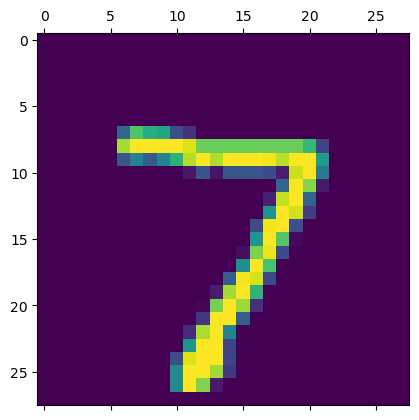

In [24]:
plt.matshow(X_test[0]) #the first image is 7; lets see what will be predicted

In [25]:
# let's see what our model will predict

In [26]:
y_predict = model.predict(X_test_flattened)
y_predict

313/313 [==============================] - 2s 5ms/step


array([[2.49112360e-02, 2.46743753e-07, 5.06884307e-02, ...,
        9.99791324e-01, 1.16096675e-01, 6.50232494e-01],
       [4.65868592e-01, 6.83451770e-03, 9.99543250e-01, ...,
        1.23666843e-12, 1.50025323e-01, 2.96647640e-09],
       [4.22627898e-04, 9.93679821e-01, 6.43989027e-01, ...,
        1.32589519e-01, 3.68017375e-01, 4.53566872e-02],
       ...,
       [4.00400586e-06, 5.33808952e-06, 1.12802046e-03, ...,
        2.23828793e-01, 4.97417510e-01, 8.05909872e-01],
       [1.30597080e-04, 1.60829135e-04, 2.01292831e-04, ...,
        4.00403151e-05, 6.47556782e-01, 1.47323692e-04],
       [1.13347238e-02, 3.20249938e-10, 2.57838875e-01, ...,
        1.58798965e-08, 2.74751859e-04, 1.81555913e-06]], dtype=float32)

In [27]:
len(y_predict)

10000

In [28]:
y_predict[0]

array([2.49112360e-02, 2.46743753e-07, 5.06884307e-02, 9.51135159e-01,
       2.46148091e-03, 9.28482190e-02, 1.07543167e-06, 9.99791324e-01,
       1.16096675e-01, 6.50232494e-01], dtype=float32)

In [29]:
np.argmax(y_predict[0])

7

In [30]:
y_test[0] ###prediction correct; see the image too, above

7

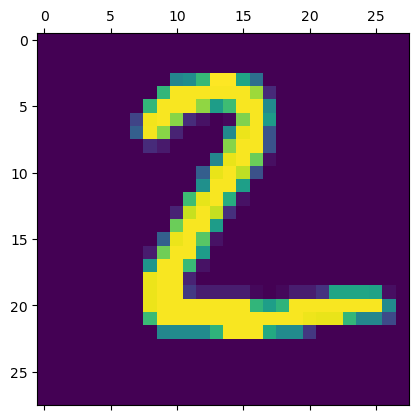

In [31]:
plt.matshow(X_test[1])

In [32]:
y_predict[1]

array([4.6586859e-01, 6.8345177e-03, 9.9954325e-01, 3.5249203e-01,
       1.3103765e-09, 8.1971610e-01, 8.6058652e-01, 1.2366684e-12,
       1.5002532e-01, 2.9664764e-09], dtype=float32)

In [33]:
np.argmax(y_predict[1])

2

In [34]:
### to have a better view of predictions, let's view them in confusion matrix plot

In [35]:
y_predicted_labels = [np.argmax(i) for i in y_predict]

In [36]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [37]:
y_test[:6]

array([7, 2, 1, 0, 4, 1], dtype=uint8)

In [38]:
y_predicted_labels[:6]

[7, 2, 1, 0, 4, 1]

In [39]:
len(y_predicted_labels)

10000

In [40]:
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 963,    0,    1,    2,    1,    5,    6,    1,    1,    0],
       [   0, 1118,    3,    2,    0,    1,    4,    2,    5,    0],
       [   4,   10,  929,   15,   11,    2,   12,   10,   36,    3],
       [   4,    0,   21,  920,    1,   20,    3,   12,   21,    8],
       [   1,    1,    4,    1,  927,    0,   10,    3,   10,   25],
       [   9,    3,    4,   31,   14,  770,   18,    6,   30,    7],
       [  11,    3,    6,    1,    8,    9,  915,    2,    3,    0],
       [   1,    6,   24,    4,   11,    1,    0,  944,    3,   34],
       [   7,    9,    7,   18,    9,   22,   10,   11,  871,   10],
       [  11,    7,    1,   10,   35,    6,    0,   19,    8,  912]])>

<Axes: >

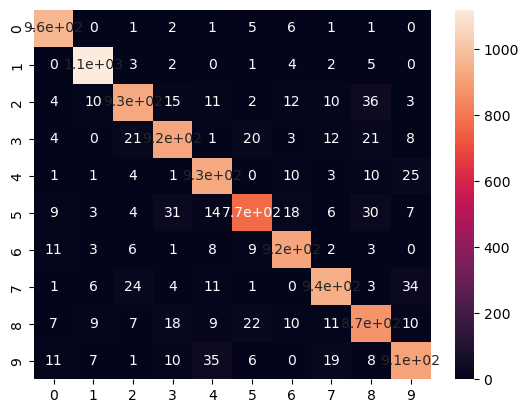

In [41]:
import seaborn as sns
sns.heatmap(cm, annot=True)


Text(45.722222222222214, 0.5, 'Truth')

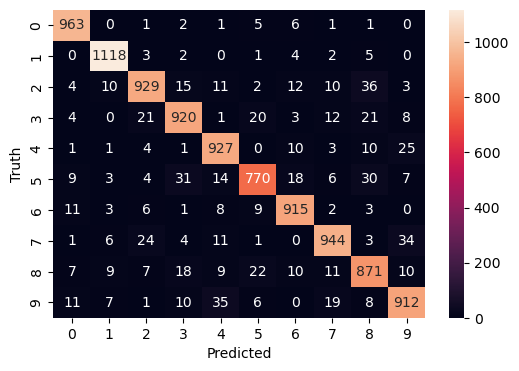

In [42]:
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted') 
plt.ylabel('Truth') 

In [43]:
### The above model is built wthout any hidden layer.
### Adding an hidden layer tends to improve the performance of our model.

In [44]:
model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation='relu'), #this is the hidden layer(we are adding only one hiddenlayer; you can actually add more)
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 21s 10ms/step - loss: 0.2687 - accuracy: 0.9234
Epoch 2/5
1875/1875 [==============================] - 24s 13ms/step - loss: 0.1238 - accuracy: 0.9631
Epoch 3/5
1875/1875 [==============================] - 22s 12ms/step - loss: 0.0877 - accuracy: 0.9722
Epoch 4/5
1875/1875 [==============================] - 20s 11ms/step - loss: 0.0672 - accuracy: 0.9800
Epoch 5/5
1875/1875 [==============================] - 21s 11ms/step - loss: 0.0543 - accuracy: 0.9835


In [45]:
model.evaluate(X_test_flattened, y_test) ###we have an improved accuracy becasue we added an hidden layer

313/313 [==============================] - 3s 7ms/step - loss: 0.0823 - accuracy: 0.9747


[0.08230824023485184, 0.9746999740600586]

In [46]:
y_predicted = model.predict(X_test_flattened)
y_predicted

313/313 [==============================] - 2s 5ms/step


array([[1.1393183e-02, 1.2654400e-02, 1.8456200e-01, ..., 9.9998784e-01,
        3.5702753e-01, 1.6376337e-01],
       [6.4276033e-03, 4.5392895e-01, 9.9999064e-01, ..., 3.2816116e-09,
        1.6721751e-01, 1.9076714e-08],
       [1.8806012e-04, 9.9933058e-01, 1.4473213e-01, ..., 1.4571707e-01,
        5.0629228e-01, 1.1966452e-03],
       ...,
       [1.9900478e-06, 2.7700027e-03, 4.1110066e-05, ..., 9.2359319e-02,
        2.5589889e-01, 9.5838112e-01],
       [3.3185806e-03, 8.7234052e-04, 9.4370556e-04, ..., 2.1865612e-04,
        9.9614722e-01, 2.2566262e-06],
       [1.9736124e-02, 7.6722918e-04, 6.7578483e-01, ..., 1.1255349e-04,
        1.6607724e-03, 1.3048082e-04]], dtype=float32)

In [47]:
y_test[:7]

array([7, 2, 1, 0, 4, 1, 4], dtype=uint8)

In [48]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]
y_predicted_labels[:7]

[7, 2, 1, 0, 4, 1, 4]

Text(45.722222222222214, 0.5, 'Truth')

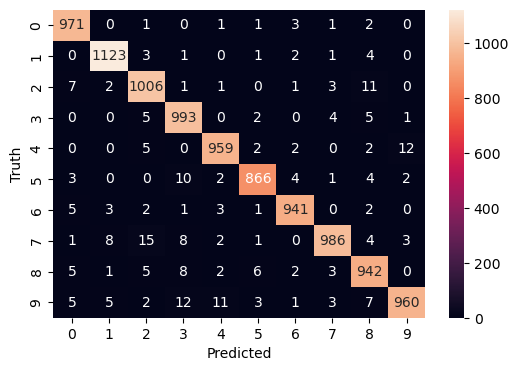

In [49]:
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_labels)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted') 
plt.ylabel('Truth')

#### There are times when you don't want to create a flattened dataset
#### You can do that using a method in keras, as in:

In [50]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(100, activation='relu'), #you don't need input shape in the hidden layer again as we have used flatten above
    keras.layers.Dense(10, activation='sigmoid')
])

tf_callbacks = tf.keras.callbacks.TensorBoard(log_dir='logs/', histogram_freq=1)

model.compile(
    optimizer='SGD', #we're using Sochastic Gradient Descent here
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(X_train, y_train, epochs=5, callbacks=[tf_callbacks]) #it is no longer X_train_flattened, but just X_train

Epoch 1/5
1875/1875 [==============================] - 21s 10ms/step - loss: 0.6558 - accuracy: 0.8329
Epoch 2/5
1875/1875 [==============================] - 14s 7ms/step - loss: 0.3355 - accuracy: 0.9069
Epoch 3/5
1875/1875 [==============================] - 17s 9ms/step - loss: 0.2871 - accuracy: 0.9192
Epoch 4/5
1875/1875 [==============================] - 20s 11ms/step - loss: 0.2581 - accuracy: 0.9279
Epoch 5/5
1875/1875 [==============================] - 19s 10ms/step - loss: 0.2363 - accuracy: 0.9340


In [57]:
%reload_ext tensorboard
%tensorboard --logdir logs/fit

ERROR: Failed to launch TensorBoard (exited with 1).
Contents of stderr:
Traceback (most recent call last):
  File "C:\Users\ADMIN\anaconda3\lib\runpy.py", line 196, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "C:\Users\ADMIN\anaconda3\lib\runpy.py", line 86, in _run_code
    exec(code, run_globals)
  File "C:\Users\ADMIN\anaconda3\Scripts\tensorboard.exe\__main__.py", line 4, in <module>
  File "C:\Users\ADMIN\anaconda3\lib\site-packages\tensorboard\main.py", line 27, in <module>
    from tensorboard import default
  File "C:\Users\ADMIN\anaconda3\lib\site-packages\tensorboard\default.py", line 33, in <module>
    from tensorboard.plugins.audio import audio_plugin
  File "C:\Users\ADMIN\anaconda3\lib\site-packages\tensorboard\plugins\audio\audio_plugin.py", line 25, in <module>
    from tensorboard.data import provider
  File "C:\Users\ADMIN\anaconda3\lib\site-packages\tensorboard\data\__init__.py", line 17, in <module>
    from tensorboard.data import

In [52]:
### Use adam and SGD optimizers, create different dir for them and compare on TensoBoard (if you dont get,see ending part of the video)

In [53]:
pip install --upgrade google-cloud-library

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement google-cloud-library (from versions: none)
ERROR: No matching distribution found for google-cloud-library
